# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import cross_val_score as cvs

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import os
from sys import platform

# Import the csv file used to create the model

In [2]:
df = pd.read_csv("../data/train.csv")
df.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
34028,34028,0.93,Good,F,SI2,61.3,62.0,6.17,6.26,3.81,8.124


# Exploration of features

    carat, cut, color, clarity, depth, table, x, y, z

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [4]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No NaN. All are numeric, except for cut, color, and clarity

## Numeric variables

### Carat

In [5]:
df.carat.describe()

count    40455.000000
mean         0.796804
std          0.473977
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

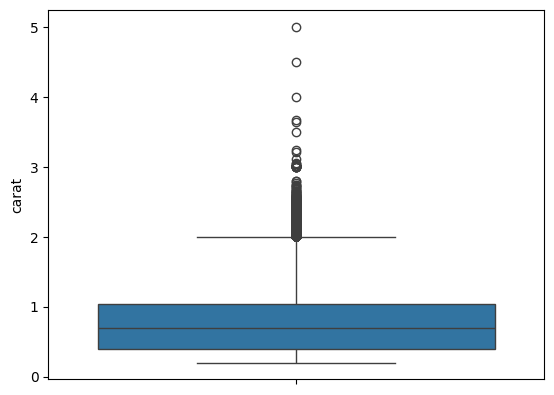

In [6]:
sns.boxplot(df.carat);
# There are outliers

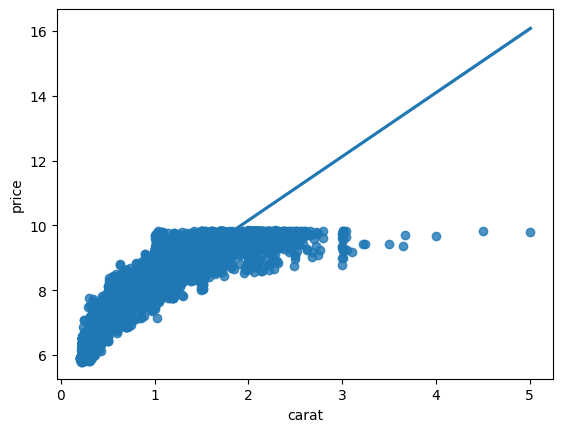

In [7]:
# How do these ouliers affect the relationship with price
sns.regplot(y = df.price, x= df.carat, fit_reg=True);
# After price value of 10, it doesn't go up with carat

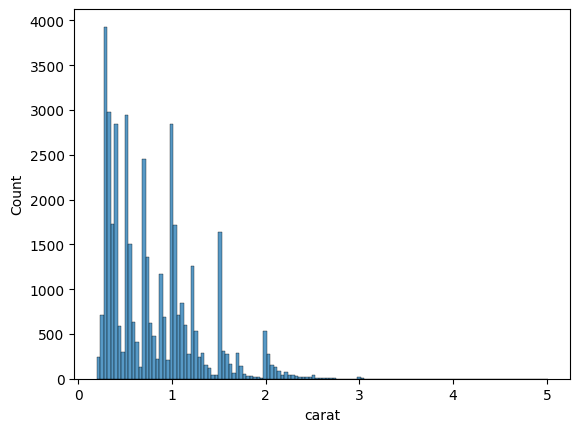

In [8]:
sns.histplot(df.carat); # Not normal

### Depth

In [9]:
df.depth.describe()

count    40455.000000
mean        61.748931
std          1.428056
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

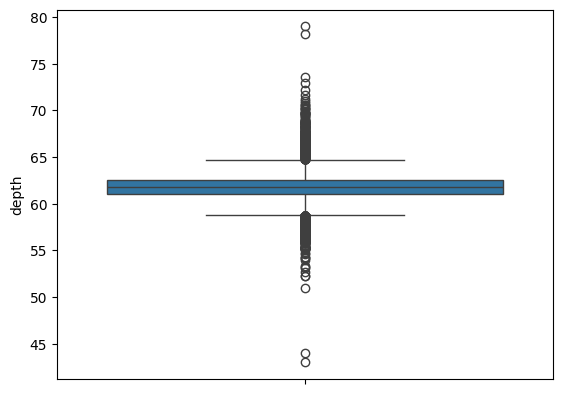

In [10]:
sns.boxplot(df.depth);
# Two extreme outliers over 75, and two extreme outliers below 45

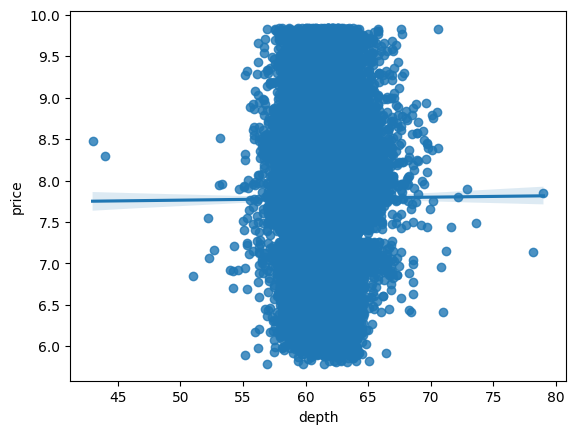

In [11]:
# How do these ouliers affect the relationship with price
sns.regplot(y = df.price, x= df.depth, fit_reg=True);
# Doesn't show correlation with price, probably will not be part of the model

In [12]:
df = df[(df["depth"] > 45) & (df["depth"] < 75)]

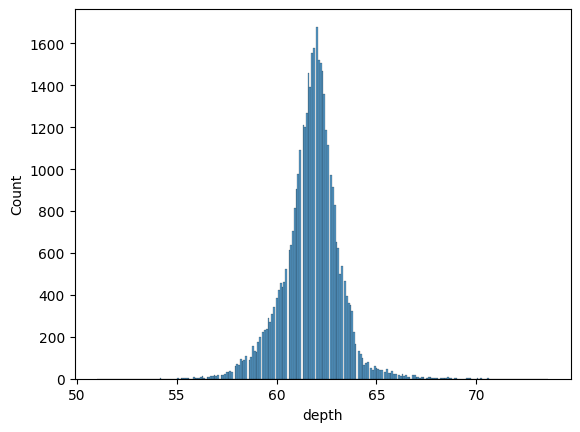

In [13]:
sns.histplot(df.depth); # seems already Normal, but also seems to have high kurtosis

### Table

In [14]:
df.table.describe()

count    40451.000000
mean        57.455316
std          2.235153
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

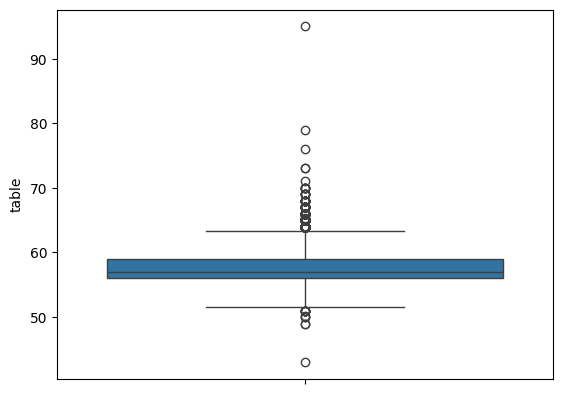

In [15]:
sns.boxplot(df.table);
# One extreme value over 90m and another extrem value, its min

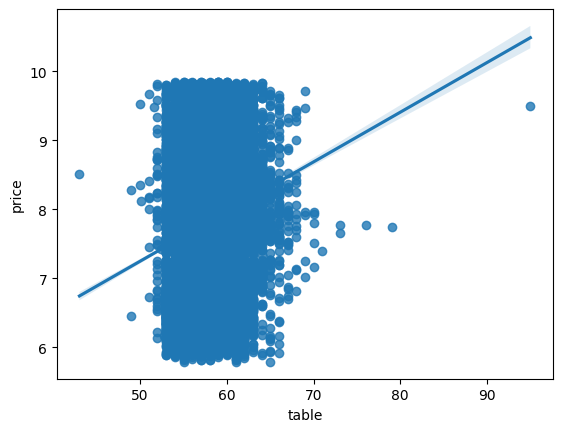

In [16]:
sns.regplot(y = df.price, x= df.table, fit_reg=True);
# Some of the outliers seem responsible for the reg curve on their own

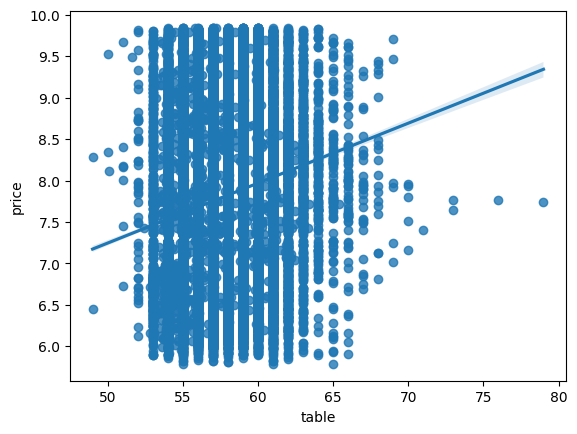

In [17]:
df = df[(df["table"] > df["table"].min()) & (df["table"] < df["table"].max())]
sns.regplot(y = df.price, x= df.table, fit_reg=True);

In [18]:
df = df[df["table"] < 75]

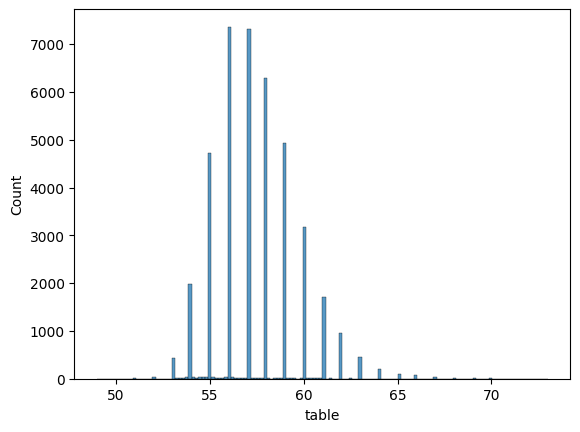

In [19]:
sns.histplot(df.table); # high variability between round values. It'll need standardization

### x

In [20]:
df.x.describe()
# The min is 0 (it shouldn't be 0)

count    40447.000000
mean         5.728179
std          1.121579
min          0.000000
25%          4.710000
50%          5.690000
75%          6.540000
max         10.740000
Name: x, dtype: float64

<Axes: ylabel='x'>

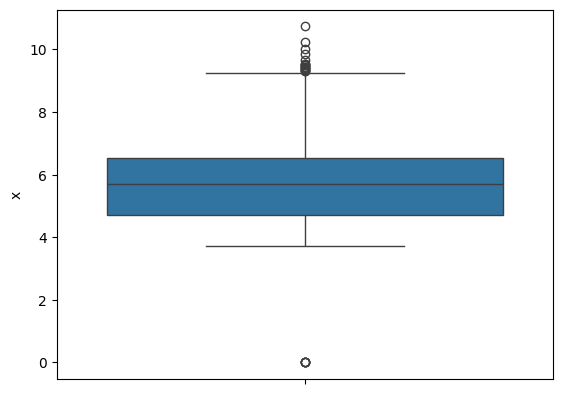

In [21]:
sns.boxplot(df.x)

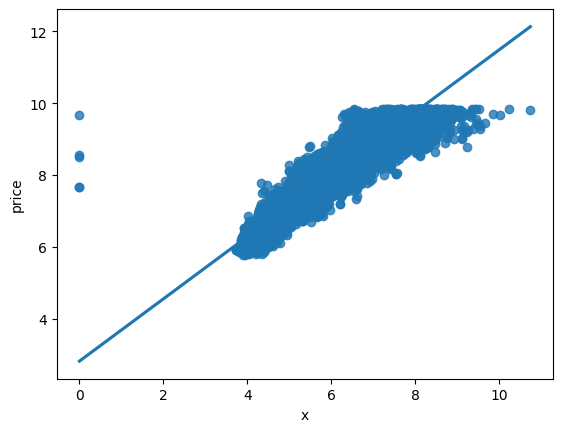

In [22]:
sns.regplot(y = df.price, x= df.x, fit_reg=True);
# Like carat, after price value of 10, it doesn't go up
# Outliers with value 0 are affecting the relationship

In [23]:
df = df.drop(df[df["x"] == 0].index)

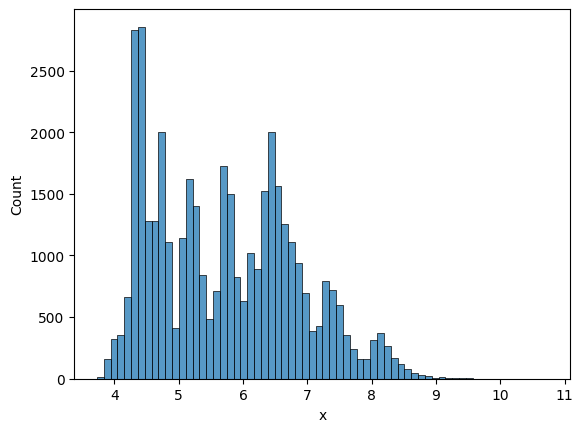

In [24]:
sns.histplot(df.x); # It'll need standardization

### y

In [25]:
df.y.describe()

count    40442.000000
mean         5.731668
std          1.119447
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         31.800000
Name: y, dtype: float64

<Axes: ylabel='y'>

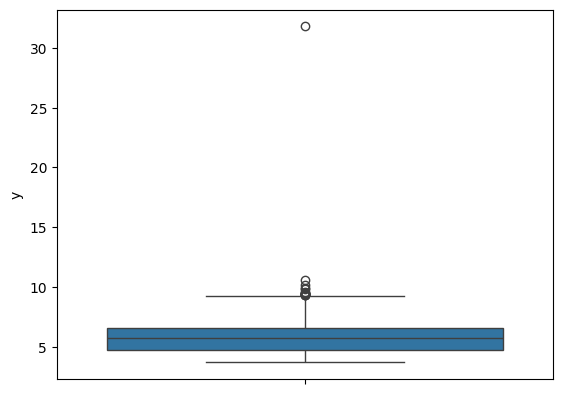

In [26]:
sns.boxplot(df.y)
# Extreme max value

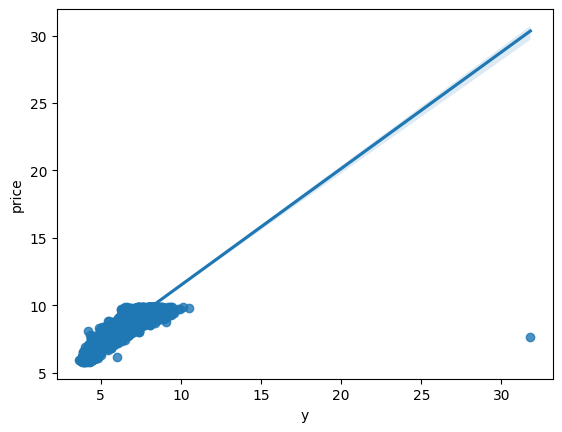

In [27]:
sns.regplot(y = df.price, x= df.y, fit_reg=True);
# Like carat and x, after price 10 it doesn't go up

In [28]:
df = df.drop(df[df["y"] == df["y"].max()].index)

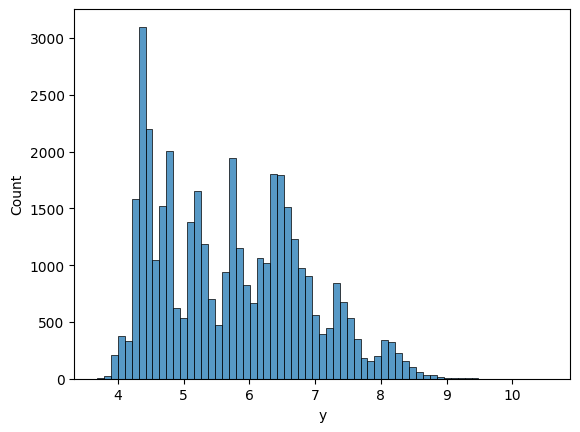

In [29]:
sns.histplot(df.y); # It'll need standardization

### z

In [30]:
df.z.describe()
# The min is 0 (it shouldn't be 0)

count    40441.000000
mean         3.537310
std          0.708151
min          0.000000
25%          2.910000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64

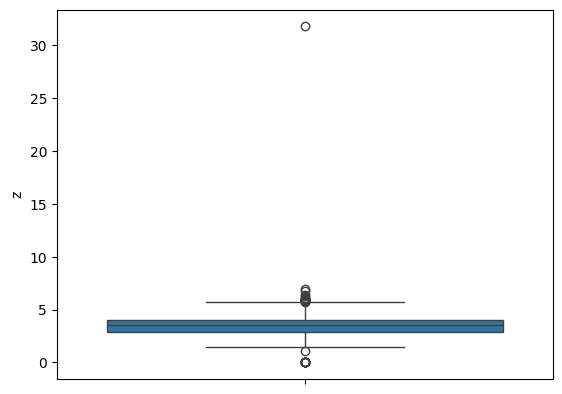

In [31]:
sns.boxplot(df.z);
# Extreme max value, and values 0

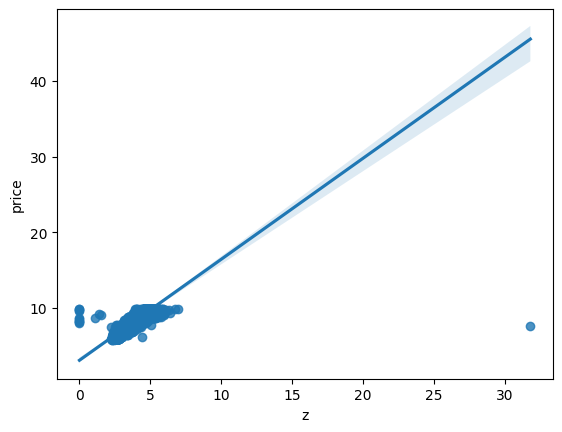

In [32]:
sns.regplot(y = df.price, x= df.z, fit_reg=True);

In [33]:
df = df.drop(df[df["z"] == 0].index)
df = df.drop(df[df["z"] == df["z"].max()].index)

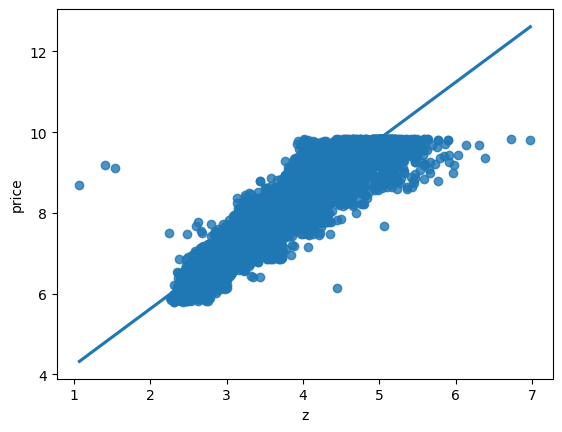

In [34]:
sns.regplot(y = df.price, x= df.z, fit_reg=True);
# values of z below 2 still clear outliers

In [35]:
df = df[df["z"] > 2]

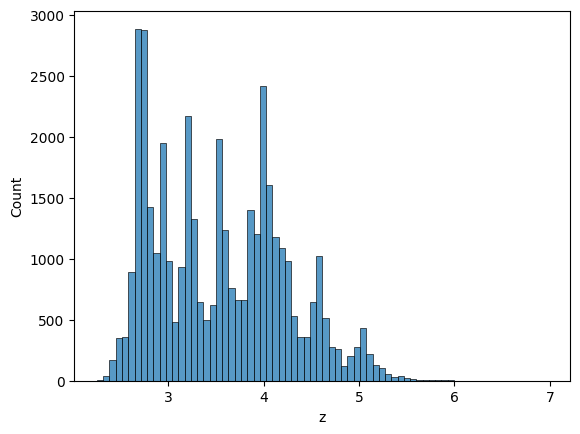

In [36]:
sns.histplot(df.z);

## Categorical variables

### Cut

In [37]:
df.cut.value_counts() # Categorical values with hierarchies -> Dictionary

cut
Ideal        16202
Premium      10288
Very Good     9078
Good          3669
Fair          1190
Name: count, dtype: int64

<Axes: xlabel='cut', ylabel='price'>

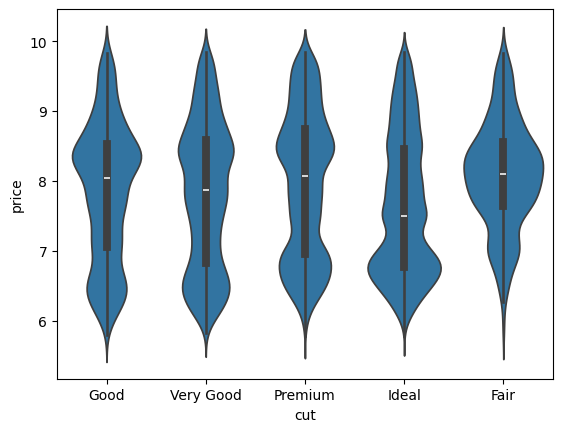

In [38]:
sns.violinplot(y = df.price, x = df.cut )
# Even though the categories seem hierarchical, their behaviour is not -> get dummies

## Color

In [39]:
df.color.value_counts() # Categorical values with hierarchies -> Dictionary

color
G    8523
E    7348
F    7161
H    6227
D    5101
I    3981
J    2086
Name: count, dtype: int64

<Axes: xlabel='color', ylabel='price'>

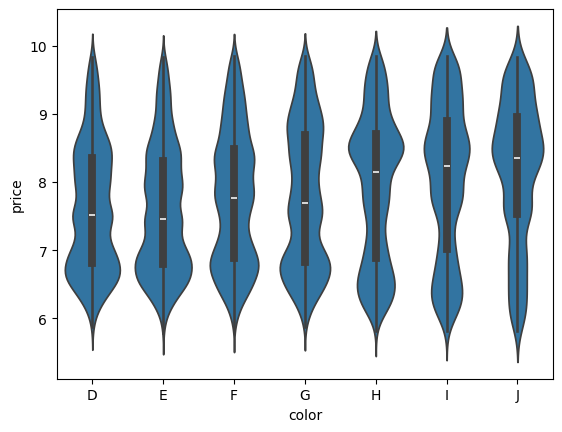

In [40]:
sns.violinplot(y = df.price, x = df.color, order=["D", "E", "F", "G", "H", "I", "J"])
# Their behaviour seems more hierarchical than cut -> dictionary

## Clarity

In [41]:
df.clarity.value_counts() # Categorical values with hierarchies -> Dictionary

clarity
SI1     9855
VS2     9190
SI2     6836
VS1     6069
VVS2    3848
VVS1    2728
IF      1367
I1       534
Name: count, dtype: int64

<Axes: xlabel='clarity', ylabel='price'>

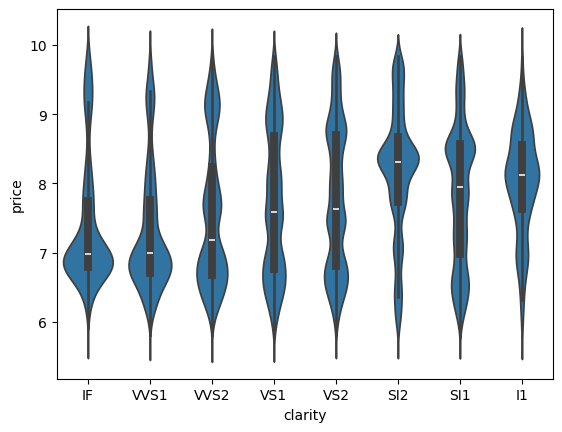

In [42]:
sns.violinplot(y = df.price, x = df.clarity, order=["IF", "VVS1", "VVS2", "VS1", "VS2", "SI2", "SI1", "I1"])
# Lower quality seems to have more price -> get dummies

# Transformations of categorical variables

## Cut to numeric

In [43]:
# Even though the categories seem hierarchical, their behaviour is not -> get dummies
onehotencoder = preprocessing.OneHotEncoder()
df[["Ideal", "Premium", "Very Good", "Good", "Fair"]] = onehotencoder.fit_transform(df["cut"].values.reshape(-1, 1)).toarray()
df.drop(columns="cut", inplace=True)

### Transform color to numeric

In [44]:
# Their behaviour seems more hierarchical than cut -> dictionary or get dummies
dict_color = {'D': 1,
              'E': 2,
              'F': 3,
              'G': 4,
              'H': 5,
              'I': 6,
              'J': 7}
df["color"] = df["color"].replace(dict_color)

### Transform clarity to numeric

In [49]:
# Lower quality seems to have more price -> get dummies
onehotencoder = preprocessing.OneHotEncoder()
df[["SI1", "VS2", "SI2", "VS1", "VVS2", "VVS1", "IF", "I1"]] = onehotencoder.fit_transform(df["clarity"].values.reshape(-1, 1)).toarray()

In [51]:
df.drop(columns="clarity", inplace=True)

## Collinearity

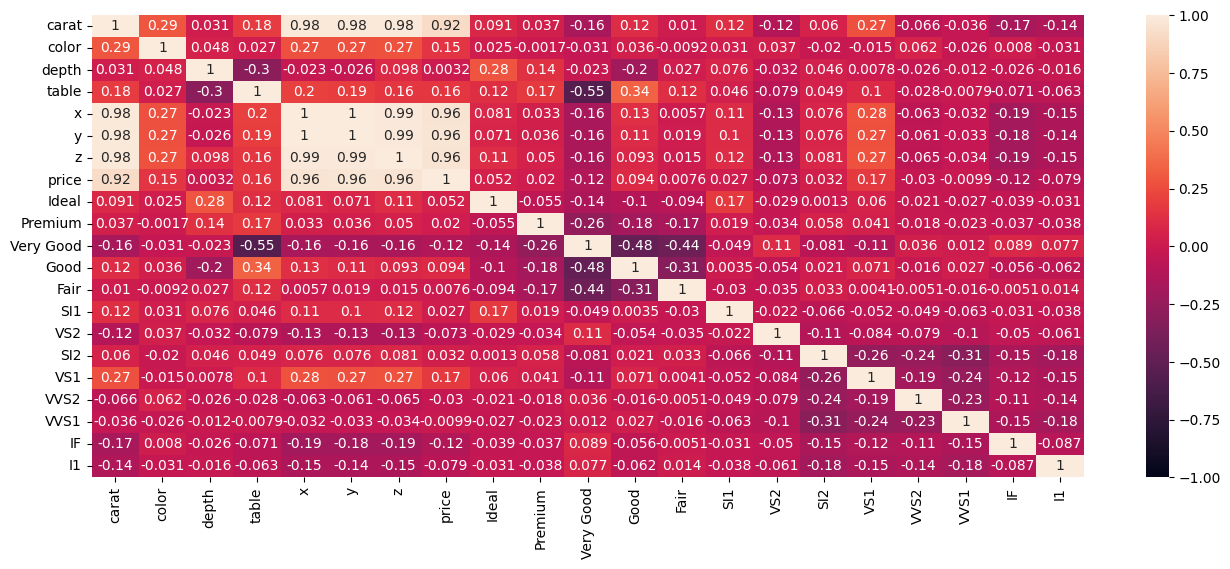

In [52]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.drop(columns=["id"]).corr(),vmin=-1, vmax=1, annot=True);
# carat is higly correlated to x, y and z, which are also highly correlated to each other (x and y have a corr of 1)
# categorical variables have poor correlation with price
    # clarity_encooded seems to perform better than each of its categories 

# Preparing the numerical data for training

In [53]:
X = df.drop(columns=["id", "price"])
y = df["price"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Train sample

### Standardization of carat

In [55]:
scaler = preprocessing.StandardScaler()

In [56]:
X_train["carat"] = scaler.fit_transform(X_train["carat"].values.reshape(-1, 1))

### Standardization of depth

In [57]:
X_train["depth"] = scaler.fit_transform(X_train["depth"].values.reshape(-1, 1))

### Standardization of table

In [58]:
X_train["table"] = scaler.fit_transform(X_train["table"].values.reshape(-1, 1))

### Standardization of x

In [59]:
X_train["x"] = scaler.fit_transform(X_train["x"].values.reshape(-1, 1))

### Standardization of y

In [60]:
X_train["y"] = scaler.fit_transform(X_train["y"].values.reshape(-1, 1))

### Standardization of z

In [61]:
X_train["z"] = scaler.fit_transform(X_train["z"].values.reshape(-1, 1))

## Test sample

### Standardization of carat

In [62]:
X_test["carat"] = scaler.fit_transform(X_test["carat"].values.reshape(-1, 1))

### Standardization of depth

In [63]:
X_test["depth"] = scaler.fit_transform(X_test["depth"].values.reshape(-1, 1))

### Standardization of table

In [64]:
X_test["table"] = scaler.fit_transform(X_test["table"].values.reshape(-1, 1))

### Standardization of x

In [65]:
X_test["x"] = scaler.fit_transform(X_test["x"].values.reshape(-1, 1))

### Standardization of y

In [66]:
X_test["y"] = scaler.fit_transform(X_test["y"].values.reshape(-1, 1))

### Standardization of z

In [67]:
X_test["z"] = scaler.fit_transform(X_test["z"].values.reshape(-1, 1))

# Models

In [68]:
X_train.columns

Index(['carat', 'color', 'depth', 'table', 'x', 'y', 'z', 'Ideal', 'Premium',
       'Very Good', 'Good', 'Fair', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1',
       'IF', 'I1'],
      dtype='object')

In [69]:
models = {
    "lr": LinReg(),
    "ridge": Ridge(),
    "lasso": Lasso(), 
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "rfr": RandomForestRegressor(),
    "svr": SVR()
}

In [76]:
# With all the features
print(f"      Model 0      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")
    
# rfr: r2 0.991677452845639

      Model I      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.1405029138505045
r2: 0.980878010114902
Mean r2 scores after 5 crossvalidations: 0.9814363076326934
------------ridge------------

RMSE, error: 0.1405107941826147
r2: 0.9808758650795778
Mean r2 scores after 5 crossvalidations: 0.9814431906465027
------------lasso------------

RMSE, error: 1.0162384466450989
r2: -0.0003538882664047005
Mean r2 scores after 5 crossvalidations: 0.14737498943318975
------------sgd------------

RMSE, error: 0.14093819136192068
r2: 0.9807593468810905
Mean r2 scores after 5 crossvalidations: -413095042874619.9
------------knn------------

RMSE, error: 0.1465714468709482
r2: 0.9791905226797422
Mean r2 scores after 5 crossvalidations: 0.9680366799698881
------------grad------------

RMSE, error

In [71]:
# With these features: all, except depth
X_train_I = X_train.drop(columns="depth")
X_test_I = X_test.drop(columns="depth")

# 'carat', 'color', 'table', 'x', 'y', 'z', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'
print(f"      Model I      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_I, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_I)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")
    
# rfr: r2 0.9917030380537348 (better)

      Model I      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.1402355503291687
r2: 0.9809507154857942
Mean r2 scores after 5 crossvalidations: 0.9814363076326934
------------ridge------------

RMSE, error: 0.14026153945554076
r2: 0.9809436542215692
Mean r2 scores after 5 crossvalidations: 0.9814431906465027
------------lasso------------

RMSE, error: 1.0162384466450989
r2: -0.0003538882664047005
Mean r2 scores after 5 crossvalidations: 0.14737498943318975
------------sgd------------

RMSE, error: 0.14363948047090253
r2: 0.9800147275415796


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean r2 scores after 5 crossvalidations: -330565755810519.1
------------knn------------

RMSE, error: 0.12969856729222262
r2: 0.9837058098760493
Mean r2 scores after 5 crossvalidations: 0.9680366799698881
------------grad------------

RMSE, error: 0.12290608154540796
r2: 0.9853678155293324
Mean r2 scores after 5 crossvalidations: 0.9873369093007283
------------rfr------------

RMSE, error: 0.10137461079400135
r2: 0.9900454685799793
Mean r2 scores after 5 crossvalidations: 0.9917030380537348
------------svr------------

RMSE, error: 0.10614297221607905
r2: 0.9890869810032517
Mean r2 scores after 5 crossvalidations: 0.9690301092011501


In [73]:
# With these features: all, except depth and clarity
X_train_II = X_train.drop(columns=['depth', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'])
X_test_II = X_test.drop(columns=['depth', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'])

print(f"      Model II      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_II, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_II)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")
    
# rfr: r2 0.9916627446545323 (better with clarity and without depth)

      Model III      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.2322477806772618
r2: 0.9477524936640545
Mean r2 scores after 5 crossvalidations: 0.9814363076326934
------------ridge------------

RMSE, error: 0.2322116086284368
r2: 0.9477687672505745
Mean r2 scores after 5 crossvalidations: 0.9814431906465027
------------lasso------------

RMSE, error: 1.0162384466450989
r2: -0.0003538882664047005
Mean r2 scores after 5 crossvalidations: 0.14737498943318975
------------sgd------------

RMSE, error: 0.23111512401043122
r2: 0.9482608660710873


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean r2 scores after 5 crossvalidations: -429078164953217.3
------------knn------------

RMSE, error: 0.22556716814738392
r2: 0.9507150640356784
Mean r2 scores after 5 crossvalidations: 0.9680366799698881
------------grad------------

RMSE, error: 0.21244613967241271
r2: 0.9562820176875225
Mean r2 scores after 5 crossvalidations: 0.9873283314403576
------------rfr------------

RMSE, error: 0.21452701487608733
r2: 0.9554214024578562
Mean r2 scores after 5 crossvalidations: 0.9916627446545323
------------svr------------

RMSE, error: 0.21346314860001878
r2: 0.9558624478122908
Mean r2 scores after 5 crossvalidations: 0.9690301092011501


In [79]:
# With these features: all, except depth and cut
X_train_III = X_train.drop(columns=['depth', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
X_test_III = X_test.drop(columns=['depth', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])

print(f"      Model III      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_III, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_III)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")
    
# rfr: r2 0.9917028528347285 (better with cut, and without depth)

      Model IV      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.1422951014660442
r2: 0.9803870770863018
Mean r2 scores after 5 crossvalidations: 0.9814363076326934
------------ridge------------

RMSE, error: 0.1422839924309423
r2: 0.9803901393441286
Mean r2 scores after 5 crossvalidations: 0.9814431906465027
------------lasso------------

RMSE, error: 1.0162384466450989
r2: -0.0003538882664047005
Mean r2 scores after 5 crossvalidations: 0.14737498943318975
------------sgd------------

RMSE, error: 0.14383336043432668
r2: 0.9799607401714907


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean r2 scores after 5 crossvalidations: -124695974949531.12
------------knn------------

RMSE, error: 0.11983536280076469
r2: 0.9860898308179753
Mean r2 scores after 5 crossvalidations: 0.9680366799698881
------------grad------------

RMSE, error: 0.12495629973499846
r2: 0.9848755798136652
Mean r2 scores after 5 crossvalidations: 0.9873389152226654
------------rfr------------

RMSE, error: 0.10282291524259969
r2: 0.9897590027918265
Mean r2 scores after 5 crossvalidations: 0.9917028528347285
------------svr------------

RMSE, error: 0.10903627481224953
r2: 0.9884839263647949
Mean r2 scores after 5 crossvalidations: 0.9690301092011501


In [80]:
# With these features: all, except y (had corr of 1 with x) and depth
X_train_IV = X_train.drop(columns=['depth', 'y'])
X_test_IV = X_test.drop(columns=['depth', 'y'])

print(f"      Model IV      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_IV, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_IV)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")
    
# rfr: r2 0.9916978594777734
# Better with y even though there's collinearity

      Model VI      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.13973970227863436
r2: 0.9810851871183002
Mean r2 scores after 5 crossvalidations: 0.9814363076326934
------------ridge------------

RMSE, error: 0.13973034508231755
r2: 0.9810877201663715
Mean r2 scores after 5 crossvalidations: 0.9814431906465027
------------lasso------------

RMSE, error: 1.0162384466450989
r2: -0.0003538882664047005
Mean r2 scores after 5 crossvalidations: 0.14737498943318975
------------sgd------------

RMSE, error: 0.13954740154341896
r2: 0.981137209981289


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean r2 scores after 5 crossvalidations: -161941871791774.8
------------knn------------

RMSE, error: 0.13623861135283563
r2: 0.9820211115156073
Mean r2 scores after 5 crossvalidations: 0.9680366799698881
------------grad------------

RMSE, error: 0.12377641575072972
r2: 0.985159852176492
Mean r2 scores after 5 crossvalidations: 0.9873441238868679
------------rfr------------

RMSE, error: 0.11378987913177387
r2: 0.9874579163133866
Mean r2 scores after 5 crossvalidations: 0.9916978594777734
------------svr------------

RMSE, error: 0.11079534944909114
r2: 0.9881093530299068
Mean r2 scores after 5 crossvalidations: 0.9690301092011501


In [83]:
# Best model is rfr with variables of MODEL I:
X_train = X_train.drop(columns="depth")
X_test = X_test.drop(columns="depth")
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

# Test csv, cleaning

In [84]:
df_test = pd.read_csv("../data/test.csv")
df_test.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z
6014,6014,0.43,Ideal,I,IF,62.3,53.0,4.82,4.9,3.02


In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


In [86]:
df_test.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [87]:
df_test["carat"] = scaler.fit_transform(df_test["carat"].values.reshape(-1, 1))

In [89]:
df_test[["Ideal", "Premium", "Very Good", "Good", "Fair"]] = onehotencoder.fit_transform(df_test["cut"].values.reshape(-1, 1)).toarray()
df_test.drop(columns="cut", inplace=True)

In [90]:
df_test["color"] = df_test["color"].replace(dict_color)

In [91]:
df_test[["SI1", "VS2", "SI2", "VS1", "VVS2", "VVS1", "IF", "I1"]] = onehotencoder.fit_transform(df_test["clarity"].values.reshape(-1, 1)).toarray()
df_test.drop(columns="clarity", inplace=True)

In [92]:
df_test["depth"] = scaler.fit_transform(df_test["depth"].values.reshape(-1, 1))

In [93]:
df_test["table"] = scaler.fit_transform(df_test["table"].values.reshape(-1, 1))

In [94]:
df_test.sample()

,id,carat,color,depth,table,x,y,z,Ideal,Premium,...,Good,Fair,SI1,VS2,SI2,VS1,VVS2,VVS1,IF,I1
227,227,0.419009,1,1.140325,0.241249,6.33,6.3,4.01,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [95]:
X_df_test = df_test.drop(columns="id")

# Final model

In [97]:
rfr = RandomForestRegressor()
rfr.fit(X, y) # We use the whole data, as this dataset contains the train sample, and the test sample comes from another csv

RandomForestRegressor()

In [99]:
df_test["price_pred"] = rfr.predict(X_df_test)
df_test.sample(10)

,id,carat,color,depth,table,x,y,z,Ideal,Premium,...,Fair,SI1,VS2,SI2,VS1,VVS2,VVS1,IF,I1,price_pred
12381,12381,-0.192677,4,-0.311725,-0.207567,5.74,5.72,3.51,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.49566
1644,1644,0.904140,7,1.278616,-0.207567,6.79,6.74,4.30,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.32594
10334,10334,-0.213770,2,-1.625485,1.587700,5.79,5.83,3.45,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.91274
10182,10182,1.558012,2,-1.279759,1.138883,7.49,7.38,4.46,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.06667
8686,8686,-0.171585,2,0.725453,-0.207567,5.71,5.73,3.59,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.98351
8114,8114,0.419009,2,-0.173435,0.241249,6.39,6.42,3.94,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.34520
12347,12347,-0.825457,2,0.725453,-1.554018,4.72,4.77,2.98,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.85242
10769,10769,1.473641,5,0.310582,0.241249,7.27,7.36,4.55,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.20128
12428,12428,0.608843,6,-1.902066,1.587700,6.78,6.75,3.98,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.31012
8854,8854,-1.057476,3,-0.104290,0.241249,4.31,4.29,2.65,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.59110


In [100]:
submission = df_test[["id", "price_pred"]]
submission = submission.rename(columns= {"id": "ID", "price_pred": "price"})

In [101]:
submission.head()

,ID,price
0,0,7.81056
1,1,6.71837
2,2,6.70238
3,3,8.76810
4,4,7.09597


In [102]:
submission.to_csv("prediction.csv", index=False)